# Factors That Affects A Borrower's Rate
## by (Somto Odenigbo)

## Investigation Overview

In this investigation, I wanted to look at the how various factors determined a borrowers rate. The main focus was on the Prosper Rating, incomeRange of borrowers, how investors choose on loans to invest in and in how these ultimately determines a borrowers rate. 


## Dataset Overview

The data consisted of Prosper ratings and attributes of aprroximately 113,900 customer dependent variable. The data was trimmed down to consist of only a hand full of data variables which precisely took the data to 15 selected columns and 76,224 variable due to inconsistencies or missing information.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# read the dataset with some columns only into a DataFrame
selected_cols = ['EmploymentStatus', 'BorrowerState', 'Term', 'Occupation',  
                 'ProsperScore', 'IsBorrowerHomeowner', 'ProsperRating (Alpha)',
                 'BorrowerRate', 'BorrowerAPR', 'LoanStatus', 'IncomeRange', 'Investors',
                 'LenderYield', 'DebtToIncomeRatio', 'ListingCategory (numeric)']
Loan = pd.read_csv("prosperLoanData.csv", usecols=selected_cols)

In [3]:
# Data Wrangling
#rename coloumns
Loan.rename({'ProsperRating (Alpha)':'ProsperRating', 'ListingCategory (numeric)':'ListingCategory', 
             'IsBorrowerHomeowner':'HomeOwner'},
           axis = 'columns', inplace=True);

#eliminating missing values
Loan.dropna(subset=['Occupation', 'ProsperScore', 'ProsperRating', 'BorrowerAPR','EmploymentStatus',
                   'DebtToIncomeRatio', 'BorrowerState'], how='any', inplace=True);

In [4]:
#convert the 'ProsperRating' column into an order categorical type
ProsperRate= ['AA', 'A', 'B', 'C', 'D', 'E', 'HR']

ProsperRatings = pd.api.types.CategoricalDtype(ordered=True, categories=ProsperRate)
Loan['ProsperRating'] = Loan['ProsperRating'].astype(ProsperRatings)


#convert the 'IncomeRange' column into an order categorical type
IncomeRange= ['$100,000+', '$75,000-99,999', '$50,000-74,999', '$25,000-49,999', '$1-24,999',
              '$0', 'Not employed']
#Returns the Income Range with the categories and orderedness
IncomeRange = pd.api.types.CategoricalDtype(ordered=True, categories=IncomeRange)

Loan['IncomeRange'] = Loan['IncomeRange'].astype(IncomeRange);

## Distribution of Borrower Rate

Borrowers Rate in the dataset take on a range of 5% to more than 35%. The distribution of borrowers rate takes on a mixed shape.

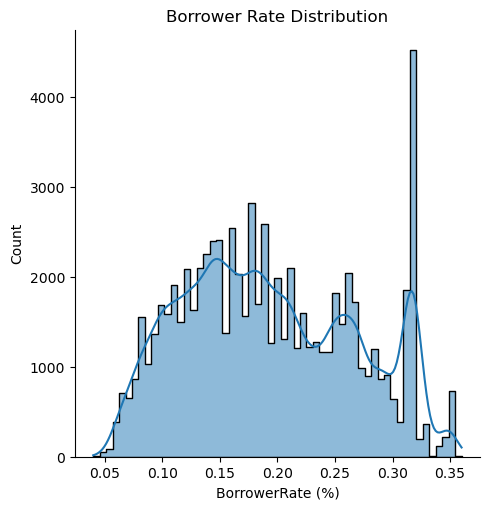

In [5]:
sns.displot(data = Loan, x= 'BorrowerRate', multiple='stack', element='step', kde=True)
plt.title('Borrower Rate Distribution')
plt.xlabel('BorrowerRate (%)');

## Borrower Rate vs Investors

Among many factors, investors think on the borrower rate to decide what loans to invest in. The data distribution shows that most times the investors choose loans with borrow rate of between 0.05 and 0.20

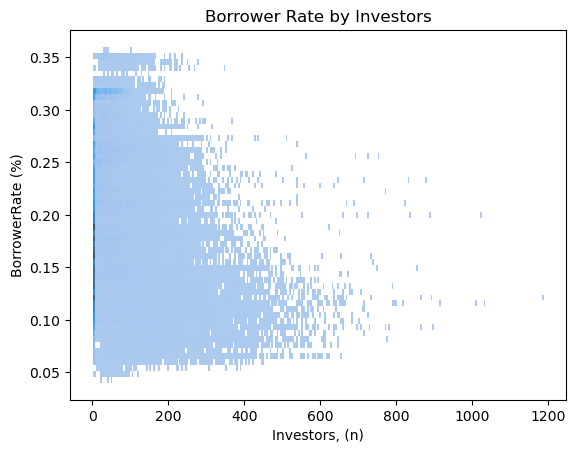

In [6]:
sns.histplot(data= Loan, x= 'Investors', y= "BorrowerRate")
plt.title('Borrower Rate by Investors')
plt.xlabel('Investors, (n)')
plt.ylabel('BorrowerRate (%)');

## Borrow Rate vs Prosper Rating

The borrower rate shows a negative and linear correlation with the Prosper rating, as shown by the data, as the borrow rate increase the prosper rate decreases. 

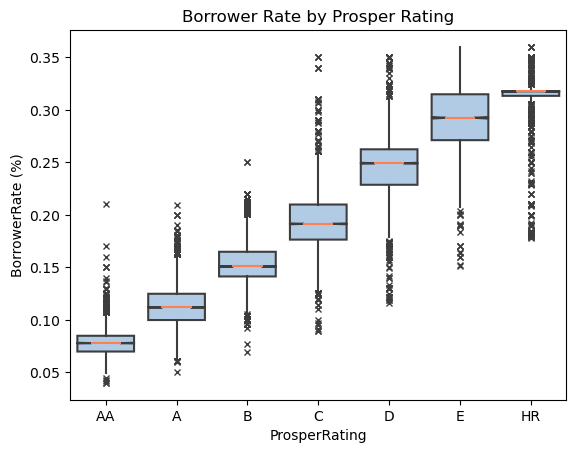

In [7]:
sns.boxplot(data= Loan, x= 'ProsperRating', y= 'BorrowerRate', notch=True, flierprops={"marker": "x"}, 
            medianprops={"color": "coral"}, boxprops={"facecolor": (.4, .6, .8, .5)}, showcaps=False)
plt.title('Borrower Rate by Prosper Rating')
plt.ylabel('BorrowerRate (%)');

### BorrowerRate by Investors and ProsperRating

The regression line best explains the data points and it tells us here that the the line fits best on the rating AA, A, B and C with rating A having the most investors and it is worth noting also that the borrower rates are lower for these rates wheres with less investors for prosper ratings D, E, HR; it could be seen why rates are higher. 
This is one of 2 significant factor that affects a borrowers rate and the investors play a part.

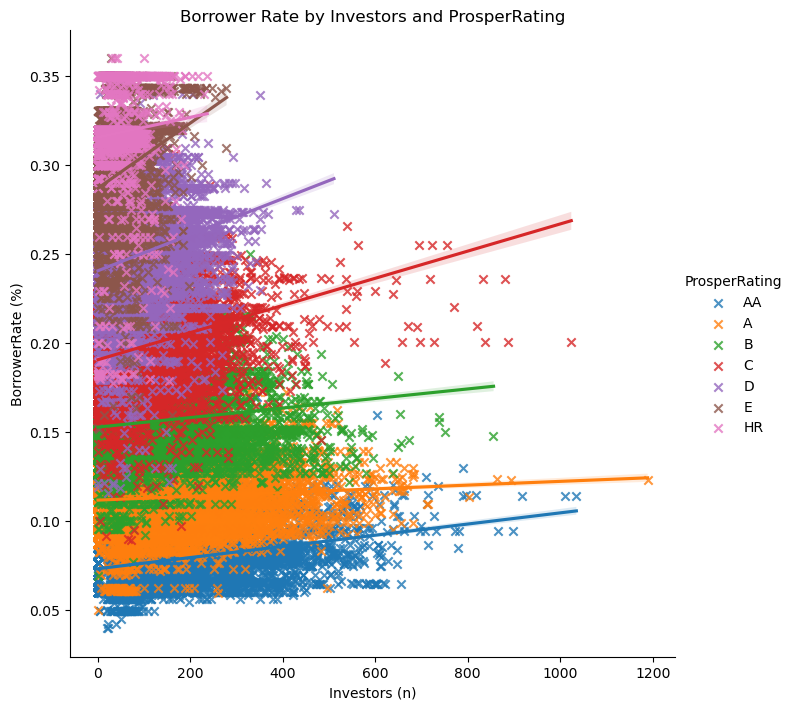

In [8]:
sns.lmplot(data = Loan, x= 'Investors', y= 'BorrowerRate', hue= 'ProsperRating', 
           height=7, x_jitter=0.5, markers= "x")
plt.ylabel('BorrowerRate (%)')
plt.xlabel('Investors (n)')
plt.title("Borrower Rate by Investors and ProsperRating");

### BorrowerRate by IncomeRange and ProsperRating

Another factor which affects a borrowers rate is the relation between the Borrow rate of a loan by the income range and prosperRate. it is represented with a grouped box plot which depicts the data so well postionally and from the distribution, it can be observed taking to account the hue parameter, that the income range is affected by the rate given on loans. Prosper Rating AA, A, B-box which is the categorize as good rates incure low borrow Rate across the income ranges with the median value as the most distinguishable factor. Rating C_box acting as the middle line between good Borrow rates and expensive borrow rate with a mean value <=0.20 and considering how dense it is, most borrowers fall under this category.

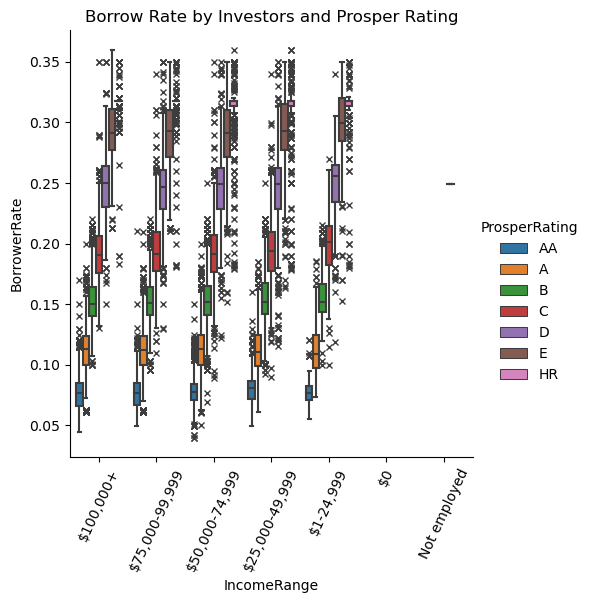

In [15]:
sns.catplot(data= Loan, x= 'IncomeRange', y= 'BorrowerRate', hue='ProsperRating', kind="box", 
            flierprops={"marker": "x"})
plt.xticks(rotation=65)
plt.title("Borrow Rate by Investors and Prosper Rating");

In [16]:
!pip install nbconvert

In [ ]:
!jupyter nbconvert ProsperLoan_slide_deck.ipynb --to slides --post serve --no-input --no-prompt